In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [340]:
cares = pd.read_csv("../data/CARES_continuous.csv")
cares

,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,48,FEMALE,NaN,NaN,NaN,BLANK,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,36,FEMALE,NaN,none,NaN,BLANK,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,64,FEMALE,NaN,mild,152.538570,g1,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,73,MALE,NaN,moderate,117.231496,g1,NaN,NO,0,1,...,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,73,MALE,0.0,mild,98.651255,g1,59.0,NO,0,0,...,no,no,no,no,no,G1,Mild,>15.7,II,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78860,81,FEMALE,0.0,none,57.609630,G3a,NaN,NO,0,0,...,no,no,no,no,no,G3,NaN,<= 15.7,II,no
78861,46,MALE,NaN,NaN,NaN,BLANK,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,yes,#NULL!,#NULL!,#NULL!,III,no
78862,66,FEMALE,2.0,mild,48.339582,G3a,NaN,NO,0,0,...,no,no,no,yes,no,G3,Mild,<= 15.7,II,no
78863,50,MALE,1.0,moderate,126.592489,g1,NaN,NO,0,0,...,no,no,no,yes,no,G1,Moderate/Severe,<= 15.7,#NULL!,no


In [341]:
cares.columns

Index(['AGE', 'GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'GradeofKidneydisease', 'DaysbetweenDeathandoperation',
       '@30daymortality', 'Preoptransfusionwithin30days', 'Intraop',
       'Postopwithin30days', 'Transfusionintraandpostop', 'AnaestypeCategory',
       'PriorityCategory', 'TransfusionIntraandpostopCategory', 'AGEcategory',
       'AGEcategoryOriginal', 'Mortality', 'thirtydaymortality',
       'SurgRiskCategory', 'RaceCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory',
       'Anemiacategorybinned', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h'],
      dtype='object')

In [404]:
# get features that are continuous
days_significant_columns = [
    'AGE',
    'PreopEGFRMDRD',
    'AGEcategory',
    'Preoptransfusionwithin30days'
    #'Intraop',
    #'Postopwithin30days',
    #'Transfusionintraandpostop'
]

days_cares = cares[days_significant_columns + ['DaysbetweenDeathandoperation']]

In [378]:
days_cares = days_cares.dropna(subset=['PreopEGFRMDRD','DaysbetweenDeathandoperation'])

In [379]:
days_cares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5371 entries, 4 to 78834
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PreopEGFRMDRD                 5371 non-null   float64
 1   AGEcategory                   5371 non-null   object 
 2   Preoptransfusionwithin30days  5371 non-null   int64  
 3   DaysbetweenDeathandoperation  5371 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 209.8+ KB


In [380]:
def check_missing_values(df):
    """
    This function checks for missing values in each column of a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to check for missing values.
    
    Returns:
    pandas.DataFrame: A DataFrame containing the count and percentage of missing values for each column.
    """
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })
    
    return missing_df

check_missing_values(days_cares)

,Missing Values,Percentage
PreopEGFRMDRD,0,0.0
AGEcategory,0,0.0
Preoptransfusionwithin30days,0,0.0
DaysbetweenDeathandoperation,0,0.0


Number of records that have mortality (ie. not alive) 78865 - 73274 = 5,591

Number of missing records for PreopEGFRMDRD: 220, hence 5,591-220 = 5,371

In [345]:
days_cares.shape

(5371, 3)

In [346]:
days_cares.head()

,AGE,PreopEGFRMDRD,DaysbetweenDeathandoperation
4,73,98.651255,59.0
45,73,95.849232,1063.0
103,87,102.832998,793.0
107,61,99.129633,17.0
108,78,107.520574,433.0


Check if features need rescaling

In [347]:
days_cares['PreopEGFRMDRD'].value_counts()

PreopEGFRMDRD
112.382587    6
96.448454     5
103.500168    5
116.484749    4
92.176993     4
             ..
122.038330    1
32.114377     1
109.175965    1
269.023482    1
177.230873    1
Name: count, Length: 4444, dtype: int64

Check deeper for PreopEGFRMDRD

In [348]:
days_cares['PreopEGFRMDRD'].describe()

count    5371.000000
mean       78.572905
std        52.254774
min         2.541026
25%        39.364003
50%        76.898013
75%       107.464507
max       588.466578
Name: PreopEGFRMDRD, dtype: float64

In [ ]:
#days_cares['Preoptransfusionwithin30days'].value_counts()

In [350]:
#days_cares['Intraop'].value_counts()

In [351]:
#days_cares['Postopwithin30days'].value_counts()

In [352]:
#days_cares['Transfusionintraandpostop'].value_counts()

Don't normalize the below first

From the above, PreopEGFRMDRD needs to be normalized as the range is significantly different from the rest

In [297]:
#use domain scaler to fit into range of other features since they share a common range from 0 to 24

days_cares['PreopEGFRMDRD'] = (days_cares['PreopEGFRMDRD']-0)/(24-0)
print('DomainScaler:\n{}'.format(days_cares['PreopEGFRMDRD'].describe()))

DomainScaler:
count    5371.000000
mean        3.273871
std         2.177282
min         0.105876
25%         1.640167
50%         3.204084
75%         4.477688
max        24.519441
Name: PreopEGFRMDRD, dtype: float64


Now let's look at dependent variable

In [353]:
days_cares["DaysbetweenDeathandoperation"].isna().value_counts()

DaysbetweenDeathandoperation
False    5371
Name: count, dtype: int64

In [354]:
days_cares['DaysbetweenDeathandoperation'].value_counts()

DaysbetweenDeathandoperation
1.0       32
7.0       26
4.0       24
6.0       23
13.0      22
          ..
1393.0     1
1551.0     1
1309.0     1
965.0      1
1315.0     1
Name: count, Length: 1400, dtype: int64

In [355]:
days_cares['DaysbetweenDeathandoperation'].describe()

count    5371.000000
mean      476.665612
std       424.401938
min         0.000000
25%       119.000000
50%       352.000000
75%       748.500000
max      1783.000000
Name: DaysbetweenDeathandoperation, dtype: float64

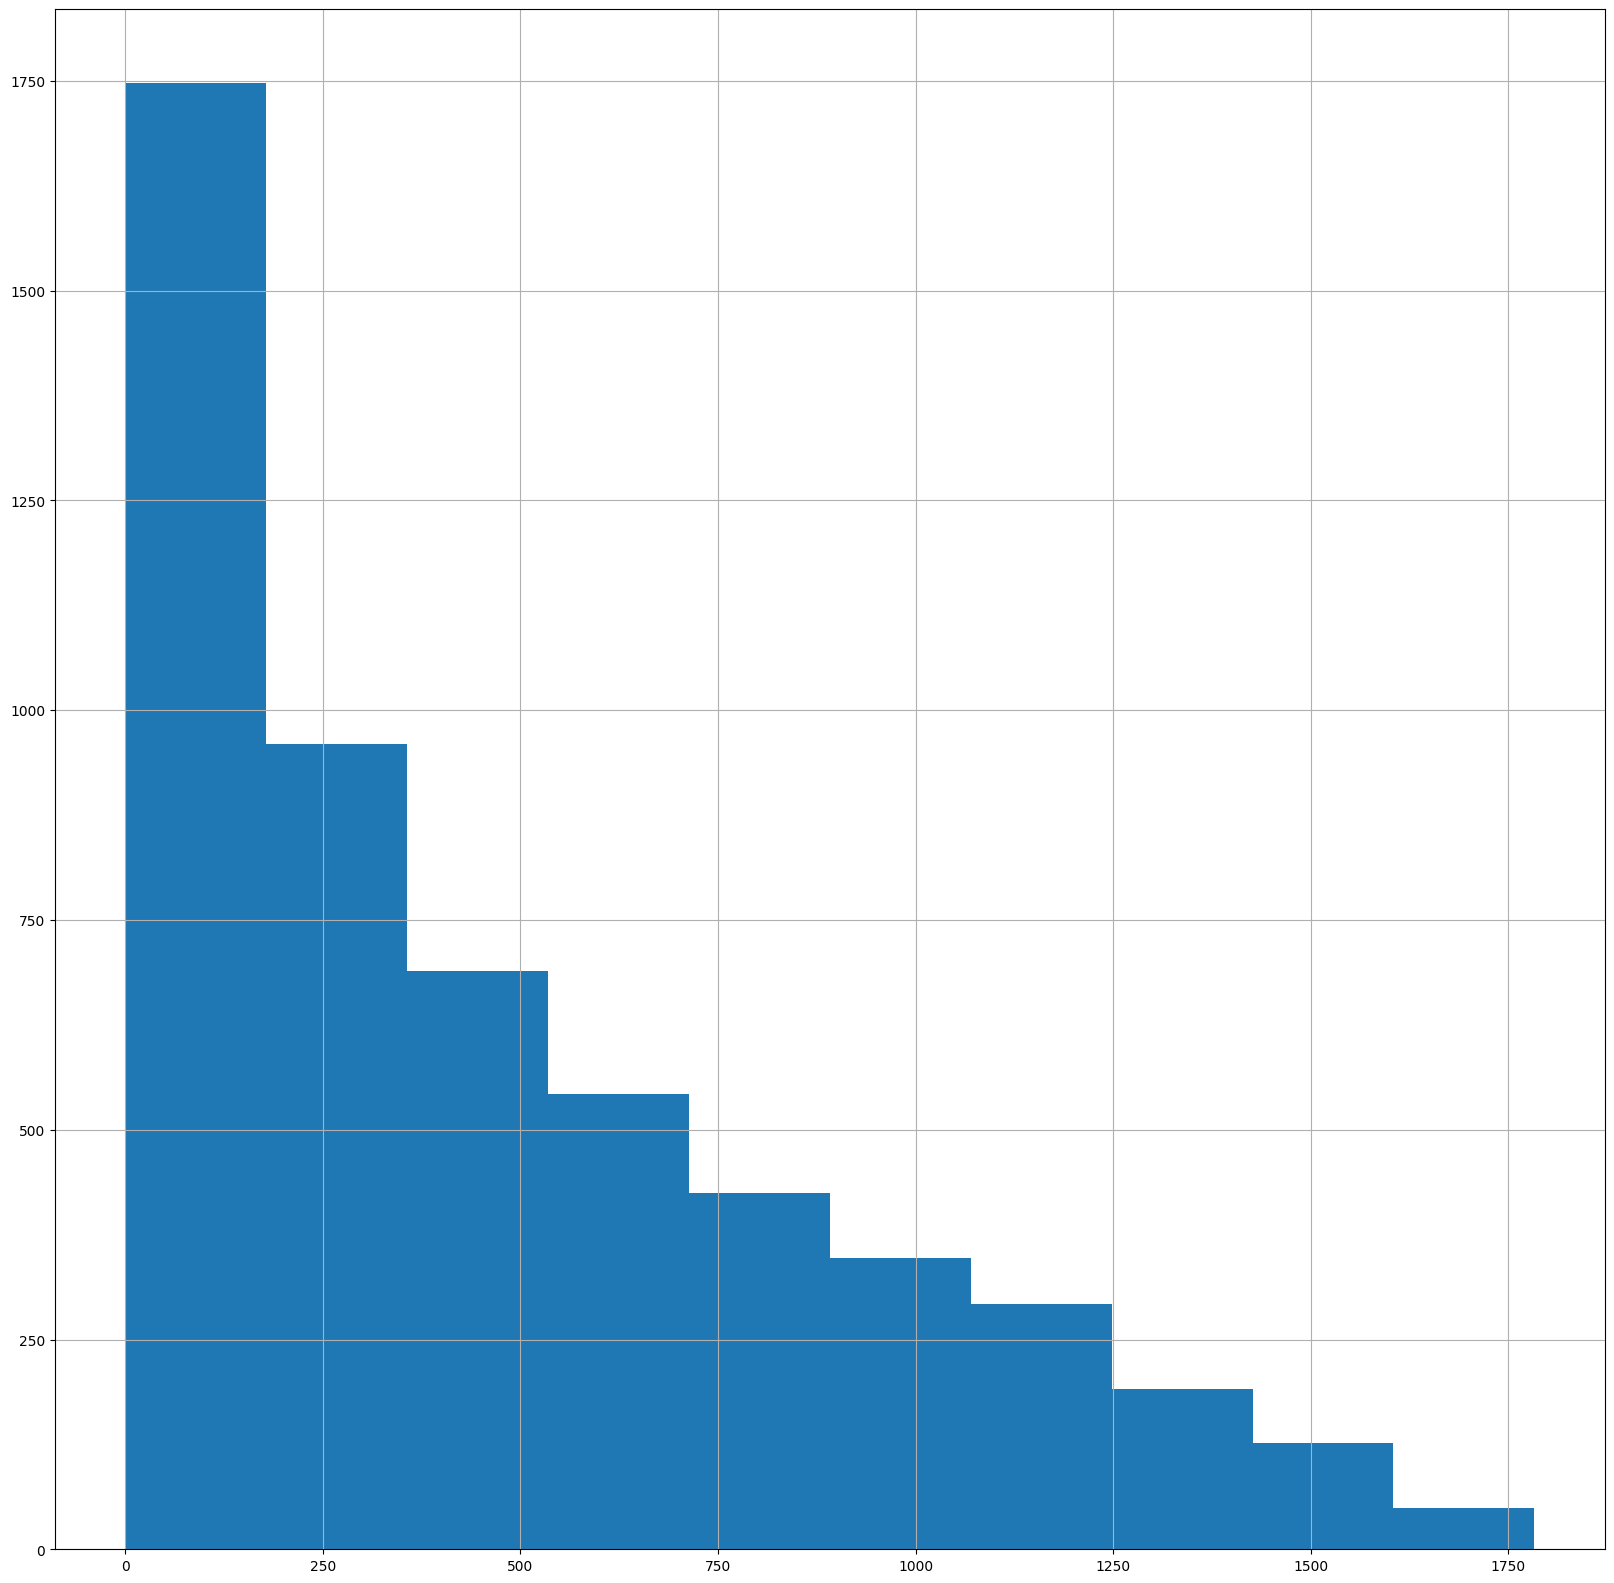

In [356]:
p = days_cares["DaysbetweenDeathandoperation"].hist(figsize=(20,20))

Dont normalize the below first

Dependent variable is highly skewed, let's try to normalize it

In [302]:
days_cares['DaysbetweenDeathandoperation'] = (days_cares['DaysbetweenDeathandoperation']-0)/(24-0)
print('DomainScaler:\n{}'.format(days_cares['DaysbetweenDeathandoperation'].describe()))

DomainScaler:
count    5371.000000
mean       19.861067
std        17.683414
min         0.000000
25%         4.958333
50%        14.666667
75%        31.187500
max        74.291667
Name: DaysbetweenDeathandoperation, dtype: float64


### Perform Decision Tree Regressor , use gridsearch to get optimal hyperparameters

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import tree, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



In [390]:
'''
Feature list
[
    'PreopEGFRMDRD',
    'Preoptransfusionwithin30days',
    'Intraop',
    'Postopwithin30days',
    'Transfusionintraandpostop'
]
'''
#try one feature first, PreopEGFRMDRD

X = days_cares[['Preoptransfusionwithin30days']]
y = days_cares['DaysbetweenDeathandoperation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [391]:
# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3759, 1)
Shape of y_train: (3759,)
Shape of X_test: (1612, 1)
Shape of y_test: (1612,)


In [392]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}


In [399]:
# Define the scoring metric
scoring = make_scorer(r2_score)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, 
                           scoring=scoring, cv=5, n_jobs=-1, verbose=2)


In [400]:
grid_search.fit(X_train, y_train,)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
154 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(r2_score, response_method='predict'),
             verbose=2)

In [401]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best estimator (i.e., the best model)
best_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [402]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Performance:")
print(f"  MSE: {mse}")
print(f"  RMSE: {rmse}")
print(f"  R²: {r2}")

Best Model Performance:
  MSE: 166722.39561193544
  RMSE: 408.3165384991593
  R²: 0.01975845137078347


### next, try one feature, AGE

In [411]:
X = days_cares[['AGE']]
y = days_cares['DaysbetweenDeathandoperation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [414]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}


In [415]:
# Define the scoring metric
scoring = make_scorer(r2_score)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, 
                           scoring=scoring, cv=5, n_jobs=-1, verbose=2)


In [416]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


ValueError: 
All the 1080 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\tree\_classes.py", line 1377, in fit
    super()._fit(
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\tree\_classes.py", line 252, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 648, in _validate_data
    y = check_array(y, input_name="y", **check_y_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input y contains NaN.

--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of DecisionTreeRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of DecisionTreeRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best estimator (i.e., the best model)
best_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Performance:")
print(f"  MSE: {mse}")
print(f"  RMSE: {rmse}")
print(f"  R²: {r2}")

# Below part is on past modelling but all yielded poor r2

### Simple Modeling (lin reg, DT reg, ridge, lasso)

In [303]:
RANDOM_SEED = 623

In [304]:
np.random.seed(RANDOM_SEED)

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import tree, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

In [ ]:
'''
[
    'PreopEGFRMDRD',
    'Preoptransfusionwithin30days',
    'Intraop',
    'Postopwithin30days',
    'Transfusionintraandpostop'
]
'''

In [359]:
X = days_cares[['PreopEGFRMDRD','Preoptransfusionwithin30days','Intraop','Postopwithin30days','Transfusionintraandpostop']]
y = days_cares['DaysbetweenDeathandoperation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [309]:
# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3759, 5)
Shape of y_train: (3759,)
Shape of X_test: (1612, 5)
Shape of y_test: (1612,)


In [311]:
# Feature engineer the generated data X by adding polynomial features of degree N
# Initialise a list of degrees 
list_deg = [1, 3, 6, 9]
# Initial number of predicted values
num_points = 1612
# Initialise the 2D array to store the predicted values
degree_predictions = np.zeros((len(list_deg), num_points))

# Initialise lists to store MSE and R² values for each degree
mae_list = []
mse_list = []
r2_list = []

for i, N in enumerate(list_deg):
    # Initialise the polynomial feature transformer 
    poly = PolynomialFeatures(degree=N)
    
    # Fits and transforms the input train data and creates new features of degree N
    #X_train_ = poly.fit_transform(X_train)

    # Fits and transforms the input train data and creates new features of degree 1
    X_train_ = poly.fit_transform(X_train)
    
    # Instantiate a linear regressor
    linreg = LinearRegression()
    
    # Train the linear regressor with X_train data with polynomial features added of degree N
    linreg.fit(X_train_, y_train)
    
    # Transform the test data to include polynomial features of the same degree
    #X_test_ = poly.fit_transform(X_test)

    # Transform the test data to include polynomial features of the same degree
    X_test_ = poly.fit_transform(X_test.values)
    
    # Store the predicted values on the ith row
    y_pred = linreg.predict(X_test_)
    degree_predictions[i, :] = y_pred
    
    # Calculate and store the MSE and R² values
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)
    
    # Print MSE and R² for the current degree
    print(f"Degree {N}: MAE = {mae:.4f}, Degree {N}: MSE = {mse:.4f}, R² = {r2:.4f}")

# degree_predictions now contains the predictions for each degree of polynomial features
degree_predictions

Degree 1: MAE = 14.1083, Degree 1: MSE = 287.9203, R² = 0.0249
Degree 3: MAE = 99843602.0338, Degree 3: MSE = 12399885030909282304.0000, R² = -41993232507750136.0000
Degree 6: MAE = 206230.5375, Degree 6: MSE = 52044608284422.6094, R² = -176253354849.8452
Degree 9: MAE = 8377697.8037, Degree 9: MSE = 42672996667178904.0000, R² = -144515619812635.6875


array([[  13.3031398 ,   21.45620372,   16.31721267, ...,   22.69372433,
          22.53325046,   14.88976294],
       [  17.03029431,   22.7161038 ,   17.74916638, ...,   21.15446191,
          21.60045229,   11.76955212],
       [  27.82082165,   23.15970401,   16.66118723, ...,   20.85247235,
          20.91207591,    8.06424487],
       [-306.59624713,   24.13803452,   16.43604558, ...,   20.11515118,
          19.3755889 ,    7.41128506]])

From polynomial regression, seems like degree 1 (lin reg) performs the best

In [327]:
# rewrite code for models

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define a function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, rmse, r2

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Support Vector Regression (SVR)": SVR(kernel='poly')  # You can experiment with different kernels
}

# Evaluate each model
for model_name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{model_name}:")
    print(f"  MAE: {mae}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R²: {r2}\n")


Linear Regression:
  MAE: 14.108332560195569
  MSE: 287.9202786541451
  RMSE: 16.968213773233323
  R²: 0.02493424938367239

Lasso Regression:
  MAE: 14.14755552910813
  MSE: 289.2606683525167
  RMSE: 17.00766498824917
  R²: 0.020394909211210788

Ridge Regression:
  MAE: 14.108327164432373
  MSE: 287.920284316907
  RMSE: 16.968213940097144
  R²: 0.02493423020626262

Decision Tree Regression:
  MAE: 18.735551075268816
  MSE: 592.8986657026392
  RMSE: 24.349510584458145
  R²: -1.0079001910358847

Support Vector Regression (SVR):
  MAE: 13.66071011473394
  MSE: 310.4666545838084
  RMSE: 17.62006397785798
  R²: -0.05142091070542598



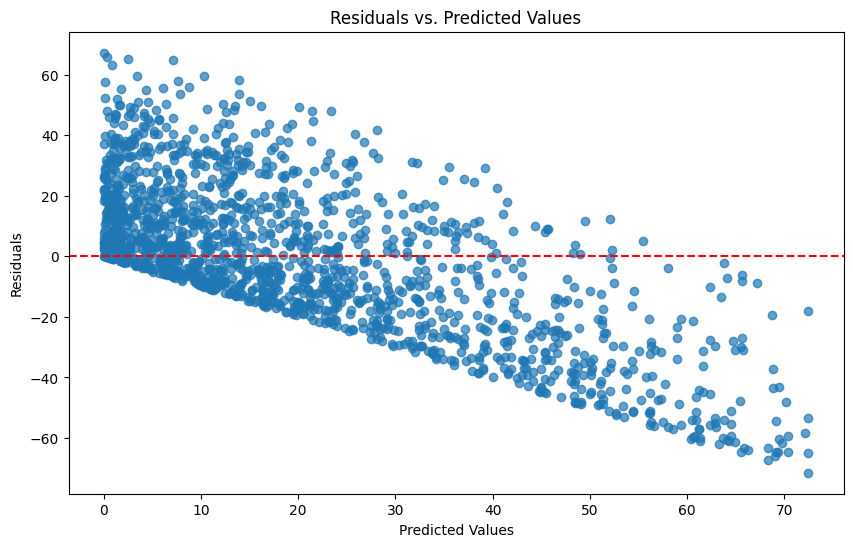

In [315]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


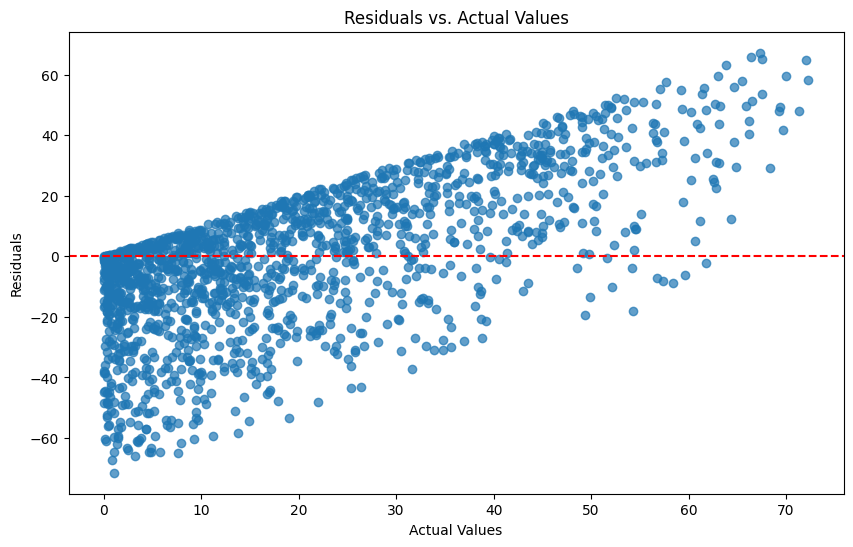

In [316]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')
plt.show()


In [313]:
# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=50)
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict using the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation results
    print(f"\n{name} Evaluation:")
    print(f"Intercept: {model.intercept_}" if hasattr(model, 'intercept_') else "")
    print(f"Coefficient: {model.coef_}" if hasattr(model, 'coef_') else "")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")


Linear Regression Evaluation:
Intercept: 23.030800536194818
Coefficient: [-0.54251673 -1.42166818 -1.87608436  0.50898929 -1.36709507]
Mean Absolute Error (MAE): 14.11
Mean Squared Error (MSE): 287.92
Root Mean Squared Error (RMSE): 16.97
R-squared (R²): 0.02

Ridge Regression Evaluation:
Intercept: 23.030735828624206
Coefficient: [-0.54251656 -1.42167721 -1.87582463  0.5088194  -1.36700523]
Mean Absolute Error (MAE): 14.11
Mean Squared Error (MSE): 287.92
Root Mean Squared Error (RMSE): 16.97
R-squared (R²): 0.02

Lasso Regression Evaluation:
Intercept: 22.85322667964954
Coefficient: [-0.52725017 -1.42255261 -1.62060618 -0.         -0.97540942]
Mean Absolute Error (MAE): 14.11
Mean Squared Error (MSE): 287.96
Root Mean Squared Error (RMSE): 16.97
R-squared (R²): 0.02

Decision Tree Regression Evaluation:


Mean Absolute Error (MAE): 18.78
Mean Squared Error (MSE): 596.06
Root Mean Squared Error (RMSE): 24.41
R-squared (R²): -1.02


In [248]:
y_pred.shape

(1612,)

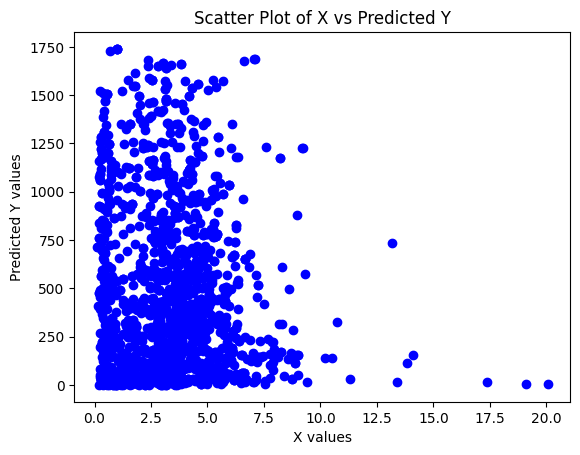

In [256]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(X_test['PreopEGFRMDRD'], y_pred, color='blue', marker='o')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('Predicted Y values')
plt.title('Scatter Plot of X vs Predicted Y')

# Show the plot
plt.show()


Try more models to capture complex relationships

In [334]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def train_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
        "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    }
    
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results[model_name] = {
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R²": r2
        }
        
        print(f"{model_name}:")
        print(f"  MAE: {mae}")
        print(f"  MSE: {mse}")
        print(f"  RMSE: {rmse}")
        print(f"  R²: {r2}\n")
    
    return results

train_models(X_train, X_test, y_train, y_test)

Random Forest:
  MAE: 16.0016004386332
  MSE: 412.96023075017854
  RMSE: 20.32142295092001
  R²: -0.39852385269049084

Gradient Boosting:
  MAE: 13.980770353880672
  MSE: 287.10320739323663
  RMSE: 16.944120142197903
  R²: 0.027701328542003356

XGBoost:
  MAE: 13.99544343431353
  MSE: 290.6101589290857
  RMSE: 17.04729183562849
  R²: 0.01582474816474777

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 3759, number of used features: 5
[LightGBM] [Info] Start training from score 20.010763
LightGBM:
  MAE: 14.018094223083397
  MSE: 290.466508918543
  RMSE: 17.043078035335725
  R²: 0.0163112307633706



C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jjwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


{'Random Forest': {'MAE': np.float64(16.0016004386332),
  'MSE': np.float64(412.96023075017854),
  'RMSE': np.float64(20.32142295092001),
  'R²': -0.39852385269049084},
 'Gradient Boosting': {'MAE': np.float64(13.980770353880672),
  'MSE': np.float64(287.10320739323663),
  'RMSE': np.float64(16.944120142197903),
  'R²': 0.027701328542003356},
 'XGBoost': {'MAE': np.float64(13.99544343431353),
  'MSE': np.float64(290.6101589290857),
  'RMSE': np.float64(17.04729183562849),
  'R²': 0.01582474816474777},
 'LightGBM': {'MAE': np.float64(14.018094223083397),
  'MSE': np.float64(290.466508918543),
  'RMSE': np.float64(17.043078035335725),
  'R²': 0.0163112307633706}}

In [337]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

def stack_models(X_train, X_test, y_train, y_test):
    # Define base models
    base_models = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('lgbm', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
    ]
    
    # Stacking model
    stacking_model = StackingRegressor(
        estimators=base_models,
        final_estimator=LinearRegression(),
        cv=5
    )
    
    # Train the stacking model
    stacking_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = stacking_model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Stacked Ensemble Model:")
    print(f"  MAE: {mae}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R²: {r2}\n")
    
    return stacking_model, {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}


In [338]:
stack_models(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 3759, number of used features: 5
[LightGBM] [Info] Start training from score 20.010763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 3007, number of used features: 5
[LightGBM] [Info] Start training from score 20.202153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 300

(StackingRegressor(cv=5,
                   estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('xgb',
                                XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature...
                                             learning_rate=0.1, max_bin=None,
                                             m